<a href="https://colab.research.google.com/github/Halves42/SpaceShip---Titanic/blob/main/Contas_%C3%A0_receber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARREGANDO A BASE DE DADOS

##IMPORTAÇÕES

In [1]:
import pandas as pd
import seaborn as sns

## SUBINDO O ARQUIVO E VISUALIZANDO ALGUMAS INFORMAÇÕES

In [2]:
contas = pd.read_excel(
'/content/Relatório contas a receber 08072022.xlsx'
)
#utilizando o pandas para ler o arquivo

In [3]:
contas.head() #Visualizando a 'cabeça' do relatório.

,Cliente,Vencimento,Emissão,Valor,Situação
0,CISCARV,2022-04-07,2022-03-08,87.90,recebível
1,CISCARV,2022-06-16,2022-05-17,424.40,recebível
2,CISCARV,2022-06-16,2022-05-17,1061.00,recebível
3,CISCARV,2022-06-16,2022-05-17,1061.00,recebível
4,CISCARV,2022-07-08,2022-06-08,34.24,recebível


In [4]:
contas.tail() #visualizando a cauda do relatório.

,Cliente,Vencimento,Emissão,Valor,Situação
69,STO ANTONIO DO LEVERGER,2022-06-10,2022-05-11,594.0,incerto
70,STO ANTONIO DO LEVERGER,2022-06-11,2022-05-12,8038.0,incerto
71,SÃO SIMAO,2022-01-01,2021-12-02,140.0,suspeita
72,SÃO SIMAO,2022-01-20,2021-12-21,140.0,suspeita
73,SÃO SIMAO,2021-07-30,2021-06-30,624.0,suspeita


In [5]:
contas.dtypes #Verificando a formatação do tipo primitivo dos registros de cada coluna.

Cliente               object
Vencimento    datetime64[ns]
Emissão       datetime64[ns]
Valor                float64
Situação              object
dtype: object

# CRIANDO UMA COLUNA PARA MÊS E UMA PARA ANO

In [6]:
contas['Ano'] = contas['Vencimento'].dt.year
contas['Mês'] = contas['Vencimento'].dt.month_name()#Existe um arugumento chamado locale() pra retornar o resultado na lingua indicada, mas não parece ter parâmetros para português.

#Daria pra converter os valores do nome do mês com a função .map passando o um dicionário com o valor original e o correspondente em português.


#As novas colunas foram criadas baseadas nos valores da data de vencimento.

In [7]:
contas

,Cliente,Vencimento,Emissão,Valor,Situação,Ano,Mês
0,CISCARV,2022-04-07,2022-03-08,87.90,recebível,2022,April
1,CISCARV,2022-06-16,2022-05-17,424.40,recebível,2022,June
2,CISCARV,2022-06-16,2022-05-17,1061.00,recebível,2022,June
3,CISCARV,2022-06-16,2022-05-17,1061.00,recebível,2022,June
4,CISCARV,2022-07-08,2022-06-08,34.24,recebível,2022,July
...,...,...,...,...,...,...,...
69,STO ANTONIO DO LEVERGER,2022-06-10,2022-05-11,594.00,incerto,2022,June
70,STO ANTONIO DO LEVERGER,2022-06-11,2022-05-12,8038.00,incerto,2022,June
71,SÃO SIMAO,2022-01-01,2021-12-02,140.00,suspeita,2022,January
72,SÃO SIMAO,2022-01-20,2021-12-21,140.00,suspeita,2022,January


#CRIANDO ALGO SIMILAR A  'TABELA DINÂMICA' -  CROSSTABE()

##2021

In [8]:
tabela_dinamica_2021 = pd.crosstab(
    index = contas.query('Ano == 2021')['Situação'],
    columns = contas['Mês'],
    aggfunc = ('sum'),
    values=contas['Valor']
  
    )


tabela_dinamica_2021 = tabela_dinamica_2021[['July', 'September', 'October', 'November', 'December']].fillna(0)#Ajustando a ordem dos meses e atribuido zero para valores nulos
tabela_dinamica_2021['Total'] = tabela_dinamica_2021.sum(axis =1)
tabela_dinamica_2021

Mês,July,September,October,November,December,Total
Situação,,,,,,
incerto,0.0,5225.60,104.28,0.0,567.67,5897.55
indevido,0.0,103.36,134.68,0.0,0.00,238.04
recebível,0.0,0.00,291.72,0.0,353.90,645.62
suspeita,624.0,0.00,41.52,3757.9,1088.87,5512.29


In [9]:
tabela_dinamica_2021.sum() #Visualizando os valores totais por mês para o ano de 2022

Mês
July           624.00
September     5328.96
October        572.20
November      3757.90
December      2010.44
Total        12293.50
dtype: float64

##2022

In [10]:
tabela_dinamica_2022 = pd.crosstab(
    index = contas.query('Ano == 2022')['Situação'],
    columns = contas['Mês'],
    aggfunc = ('sum'),
    values=contas['Valor']
  
    )


tabela_dinamica_2022 = tabela_dinamica_2022[['January', 'March', 'April',  'May', 'June', 'July']].fillna(0)#Ajustando a ordem dos meses e atribuido zero para valores nulos
tabela_dinamica_2022['Total'] = tabela_dinamica_2022.sum(axis =1)
tabela_dinamica_2022

Mês,January,March,April,May,June,July,Total
Situação,,,,,,,
incerto,0.0,1466.12,2661.26,3963.89,16667.24,1551.75,26310.26
recebível,0.0,351.60,1492.14,729.43,7999.21,20119.54,30691.92
suspeita,718.6,204.00,917.82,0.00,0.00,0.00,1840.42


In [11]:
tabela_dinamica_2022.sum() #Visualizando os valores totais por mês para o ano de 2022

Mês
January      718.60
March       2021.72
April       5071.22
May         4693.32
June       24666.45
July       21671.29
Total      58842.60
dtype: float64

Alterando os argumentos do cross tabe é possível alterar a forma tabela, assim como são feitos os ajustes de filtros e parâmetros da tabela dinâmica do excel.


Você pode encontrar formas semelhantes de se fazer esse processo utilizando outros metódos do Pandas (Groupby, cut, merge).

#Extras (Totais por cliente a visualizações simples)

##Totais por cliente e métricas.

In [12]:
#CRIANDO UMA TABELA COM OS VALORES DAS DÍVIDAS SEPARADA POR CLIENTE E ANO

clientes = pd.crosstab(
    index = contas['Cliente'],
    columns = contas['Ano'],
    aggfunc = ('sum'),
    values=contas['Valor']
  
    )


clientes['Total'] = clientes.sum(axis =1)
clientes = clientes.sort_values(by='Total', ascending= False).fillna(0)#Ordenando em ordem descrescente e atribuindo 0 para registros nulos.

clientes

Ano,2021,2022,Total
Cliente,,,
COLORADO DOESTE,0.00,15605.17,15605.17
RONDOLANDIA,3140.00,7082.50,10222.50
STO ANTONIO DO LEVERGER,0.00,8632.00,8632.00
CUJUBIM,645.62,7139.64,7785.26
CISCARV,0.00,7611.40,7611.40
NIQUELÂNDIA,2189.88,1772.76,3962.64
CAMPO NOVO DE RO,0.00,2467.71,2467.71
CARMESIA,399.97,1755.24,2155.21
MACHADINHO D'OESTE,0.00,2117.40,2117.40


##Visualizações

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


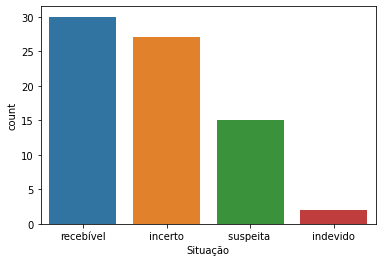

In [13]:
#GRÁFICO DE BARRAS SIMPLES COM A VISUALIZAÇÃO DA DISTRBUIÇÃO DE FREQUÊNCIA PARA CADA TAG DE SITUAÇÃO

sns.countplot(contas.Situação)

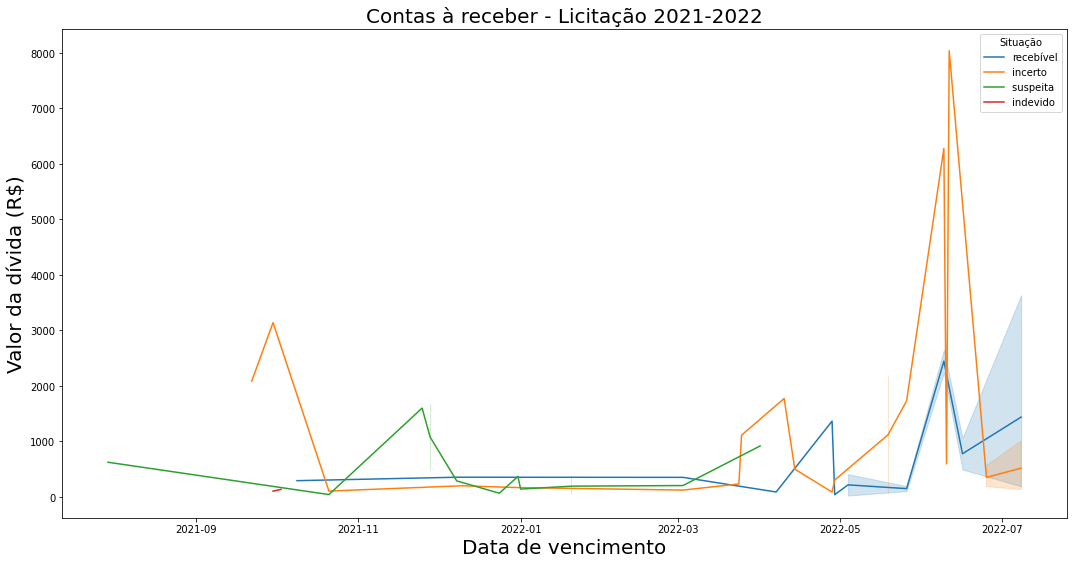

In [14]:
#GRÁFICO DE LINHA DA TIMESERIES DAS DÍVIDAS ORGANIZADAS POR TAG DE SITUAÇÃO

ax = sns.lineplot(x= 'Vencimento', y= 'Valor', data = contas, hue = 'Situação')
ax.figure.set_size_inches(18,9)
ax.set_title('Contas à receber - Licitação 2021-2022', loc = 'center', fontsize = 20)
ax.set_xlabel('Data de vencimento', fontsize = 20)
ax.set_ylabel('Valor da dívida (R$)', fontsize = 20)
ax = ax

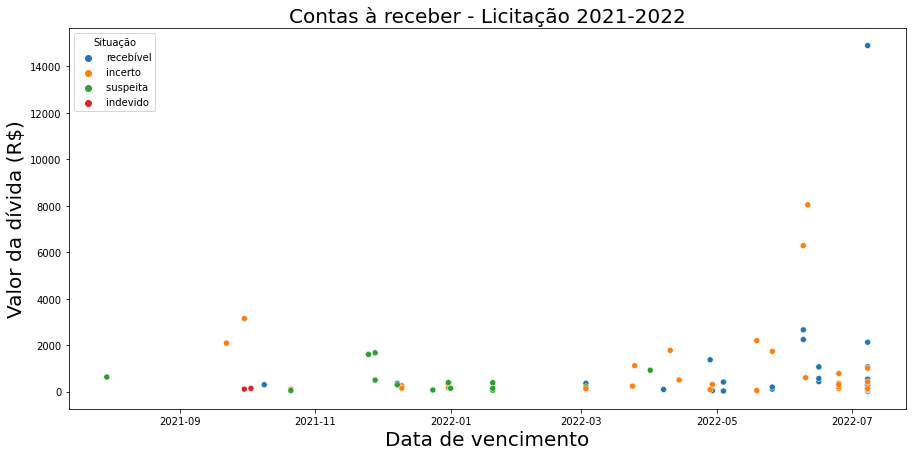

In [15]:
#SACATTERPLOT COM A DA LOCALIZAÇÃO DAS TAGS EM RELAÇÃO A TIMESERIES E VALOR 

ax = sns.scatterplot(x= 'Vencimento', y= 'Valor', data = contas, hue = 'Situação')
ax.figure.set_size_inches(15,7)
ax.set_title('Contas à receber - Licitação 2021-2022', loc = 'center', fontsize = 20)
ax.set_xlabel('Data de vencimento', fontsize = 20)
ax.set_ylabel('Valor da dívida (R$)', fontsize = 20)
ax = ax